# Project_4

## Witch Trials Dataset 

Some years ago, economists Peter T. Leeson and Jake Russ compiled a dataset of 10,000+ witch trials in Europe. Over the course of 550 years, the trials accused more than 43,000 people and led to 16,000 deaths.

## Part 1: Upload the data

### Libraries
Pandas and numpy will be needed for the analysis of the data.

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

### Import data
Import the data from the .csv file provided and assign it to a variable named data

In [173]:
df = pd.read_csv("trials.csv")

## Part 2: Examining Data for Potential Issues

One of the first things we want to do is examine the data and look for any potential issues. Some of the things we are interested in identifying in the data at this stage include:

- Missing values, Special characters, Incorrect values, Extreme values or outliers, Duplicate records, Incorrect data types

The presence of these may cause problems when it's time to analyze the data, so we want to make sure we address them beforehand.

Let's see how the data looks by using pandas methods.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10940 entries, 0 to 10939
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           10009 non-null  float64
 1   decade         10940 non-null  int64  
 2   century        10940 non-null  int64  
 3   tried          10940 non-null  int64  
 4   deaths         7114 non-null   float64
 5   city           5727 non-null   object 
 6   gadm.adm2      9893 non-null   object 
 7   gadm.adm1      10781 non-null  object 
 8   gadm.adm0      10940 non-null  object 
 9   lon            5137 non-null   float64
 10  lat            5137 non-null   float64
 11  record.source  10940 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.0+ MB


In [175]:
df.head(10)

year  decade  century  tried  deaths city gadm.adm2 gadm.adm1 gadm.adm0  \
0   NaN    1520     1500      1     1.0  NaN       NaN       NaN   Estonia   
1   NaN    1530     1500      1     1.0  NaN       NaN       NaN   Estonia   
2   NaN    1540     1500      5     5.0  NaN       NaN       NaN   Estonia   
3   NaN    1580     1500      7     5.0  NaN       NaN       NaN   Estonia   
4   NaN    1590     1500     11     0.0  NaN       NaN       NaN   Estonia   
5   NaN    1600     1600      6     1.0  NaN       NaN       NaN   Estonia   
6   NaN    1610     1600     22    18.0  NaN       NaN       NaN   Estonia   
7   NaN    1620     1600     14     8.0  NaN       NaN       NaN   Estonia   
8   NaN    1630     1600     25     4.0  NaN       NaN       NaN   Estonia   
9   NaN    1640     1600     39    10.0  NaN       NaN       NaN   Estonia   

   lon  lat record.source  
0  NaN  NaN  Madar (1990)  
1  NaN  NaN  Madar (1990)  
2  NaN  NaN  Madar (1990)  
3  NaN  NaN  Madar (1990)  
4  NaN  NaN  Madar (1990)  
5  NaN  NaN  Madar (1990)  
6  NaN  NaN  Madar (1990)  
7  NaN  NaN  Madar (1990)  
8  NaN  NaN  Madar (1990)  
9  NaN  NaN  Madar (1990)

In [176]:
#Looking for the number of missing values
df.isna().sum()

year              931
decade              0
century             0
tried               0
deaths           3826
                 ... 
gadm.adm1         159
gadm.adm0           0
lon              5803
lat              5803
record.source       0
Length: 12, dtype: int64

In [177]:
# analyzing the column names
#df.loc[df['gadm.adm0'] == 'France']
# COMMUNE, DEPARTEMENT, REGION, COUNTRY

## Part 3: Data cleansing (missing values, outliers, duplicates, data consistently)

### 1. Renaming columns

In [178]:
df.rename(columns={'gadm.adm2': 'district',
                   'gadm.adm1': 'region',
                   'gadm.adm0': 'country',
                   'record.source': 'source'},
                    inplace=True, errors='raise')

###2. Missing values

In [179]:
# we drop the "City" column because half of the data is missing.
df.drop(['city'], axis = 1, inplace = True)
# we drop "District" column also because it doesn't give us much insight.
df.drop(['district'], axis = 1, inplace = True)

In [180]:
# filling year nan's from the decade column.
df.year.fillna(df.decade, inplace=True)

In [181]:
# average deaths
df_average_deaths=df['deaths'].mean()
df_average_deaths

2.295895417486646

This fills the nan values in the "deaths" column by country averages. But we still have countries that we don't have any data. So we have to fill those in with the average of all countries.


In [182]:
# Calculate the average deaths for each country
avg_deaths = df.groupby("country")["deaths"].transform("mean")

# Create a new column with the average deaths
df["avg_deaths"] = avg_deaths

# Fill the missing values in the deaths column with the values in the avg_deaths column
df["deaths"].fillna(df["avg_deaths"]-2, inplace=True)

# Drop the avg_deaths column
df.drop(["avg_deaths"], axis=1, inplace=True)

df.isna().sum()

year          0
decade        0
century       0
tried         0
deaths      444
region      159
country       0
lon        5803
lat        5803
source        0
dtype: int64

In [183]:
# We fill the rest of the "deaths" column nan's with the average.
df["deaths"].fillna(df_average_deaths-2, inplace=True)
df.isna().sum()

year          0
decade        0
century       0
tried         0
deaths        0
region      159
country       0
lon        5803
lat        5803
source        0
dtype: int64

In [184]:
#Drops the rows where region is na.
df = df[df['region'].notna()]
df.isna().sum()
before_dropping_latitudes_version = df

In [185]:
#df.drop(['lon'], axis = 1, inplace = True)
#df.drop(['lat'], axis = 1, inplace = True)

### 3. Normalize the type of the columns

In [186]:
# Fixed datatypes of year and deaths columns from float to int.
df['year'] = df['year'].astype('int64')
df['deaths'] = df['deaths'].astype('int64')
df.dtypes

year         int64
decade       int64
century      int64
tried        int64
deaths       int64
region      object
country     object
lon        float64
lat        float64
source      object
dtype: object

### 4. Finding and Removing Duplicates

In [187]:
# We check for duplicates and remove them.
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  4568


### 5. Low variance column


In [188]:
## Check for low variance data.
low_variance = []

for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

[]


### 6. Extreme Values and Outliers

In [189]:
#Finding outliers.
def find_outliers_by_decile(data, columns):
    outliers = pd.DataFrame(columns=data.columns)
    
    for col in columns:
        lower_decile = data[col].quantile(0.05)
        upper_decile = data[col].quantile(0.95)
        results = data[(data[col] < lower_decile) | (data[col] > upper_decile)].copy()
        results['Outlier'] = col
        outliers = outliers.append(results)
        
    return outliers

## Find the outlier for only 2 columns 'Retweets#','Favorites#'

outliers = find_outliers_by_decile(df, columns=['deaths','tried'])

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\778073300.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\778073300.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [190]:
#Dropping outliers.
#df.drop(outliers.index, inplace=True)
df
# We reset the index.
df=df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

## Part 4 : Export the Data to a CSV file

In [191]:
#Export dataframe as csv.
df.to_csv('project_4_clean.csv')

## Part 5 :  Data Analysis

In this part we use statistics, crosstabs, groupby, pivots to analyze the data in order to develop ideas for visualizations.


In [192]:
# average tried and deaths per country.
df.groupby("country")["tried","deaths"].mean()

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\553916516.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



tried    deaths
country                            
Austria          6.583333  1.083333
Belgium          1.458150  0.330396
Czech Republic   2.000000  0.000000
Denmark          1.000000  0.000000
France           5.830565  1.858804
...                   ...       ...
Poland           1.333333  0.222222
Spain           67.206897 -0.862069
Sweden           1.000000  0.000000
Switzerland     10.781649  6.609756
United Kingdom   2.292913 -0.061417

[15 rows x 2 columns]

In [193]:
# Count of data per country
df.groupby("country")["source"].count()

country
Austria            12
Belgium           454
Czech Republic      1
Denmark            28
France            602
                 ... 
Poland              9
Spain              29
Sweden            242
Switzerland       861
United Kingdom    635
Name: source, Length: 15, dtype: int64

In [194]:
# trial average by decades.
df.groupby('decade').agg({'tried': 'mean'}).reset_index()

decade     tried
0     1300  1.285714
1     1310  1.181818
2     1320  4.125000
3     1330  2.800000
4     1340  1.000000
..     ...       ...
48    1780  1.000000
49    1790  1.000000
50    1820  1.000000
51    1830  1.000000
52    1850  1.000000

[53 rows x 2 columns]

In [195]:
# deaths average by decades.
df.groupby('decade').agg({'deaths': 'mean'}).reset_index()

decade    deaths
0     1300  0.571429
1     1310  0.454545
2     1320  0.375000
3     1330  1.000000
4     1340  0.571429
..     ...       ...
48    1780  0.333333
49    1790  1.000000
50    1820  0.000000
51    1830  0.000000
52    1850  0.000000

[53 rows x 2 columns]

In [196]:
df.groupby("decade")["tried","deaths"].mean()

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\664656787.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



tried    deaths
decade                    
1300    1.285714  0.571429
1310    1.181818  0.454545
1320    4.125000  0.375000
1330    2.800000  1.000000
1340    1.000000  0.571429
...          ...       ...
1780    1.000000  0.333333
1790    1.000000  1.000000
1820    1.000000  0.000000
1830    1.000000  0.000000
1850    1.000000  0.000000

[53 rows x 2 columns]

## Part 6 : Visualization Creation 

The heatmap shows us if there is correlation between variables.

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\3298119102.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

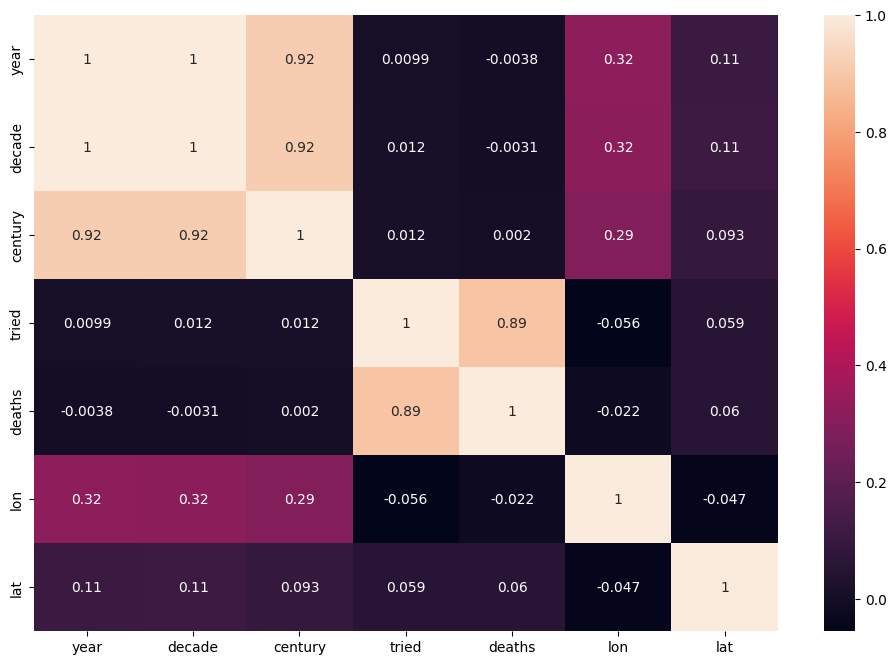

In [208]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Source count by Country')

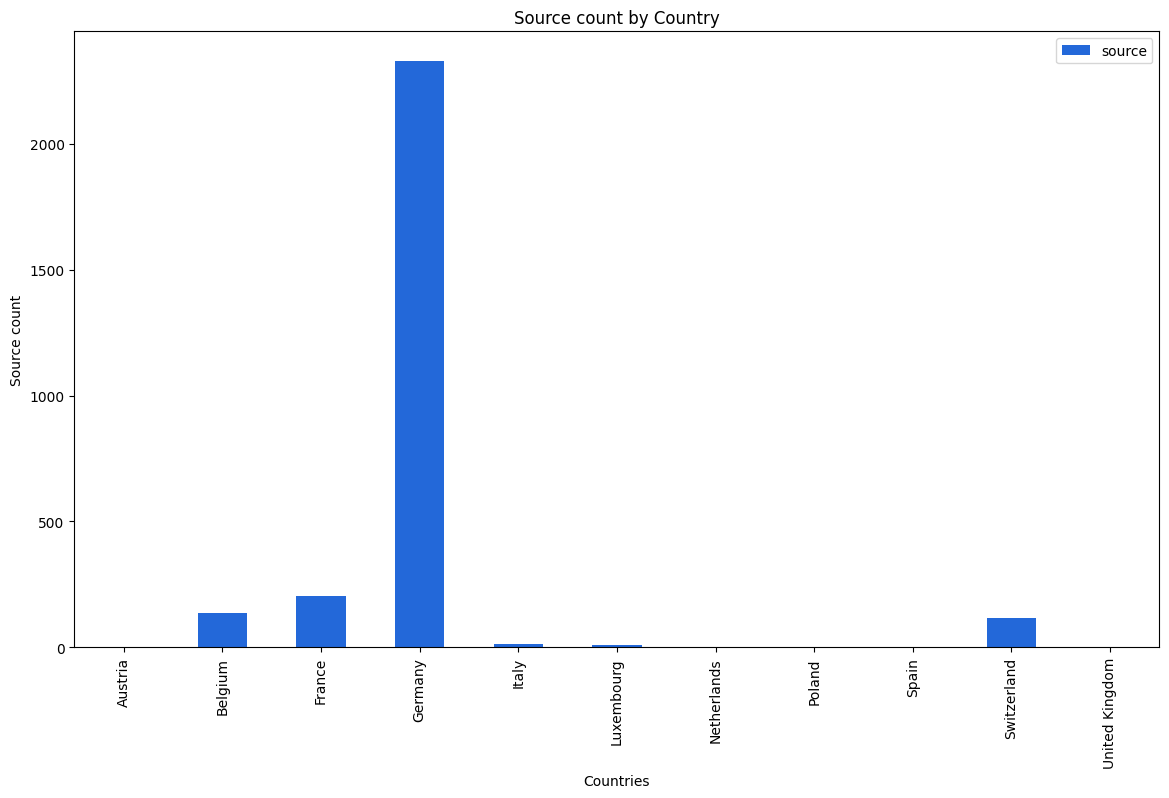

In [209]:
# Count of data per country
source_df=df.groupby("country")["source"].count()

dataframe1=pd.DataFrame(source_df)
#plt.bar(dataframe1["country"], dataframe1["source"])

dataframe1.plot(kind='bar', figsize=(14, 8), color="#2368d9")
plt.xlabel("Countries")
plt.ylabel("Source count")
plt.title("Source count by Country")

In [211]:
#Plotly
#Scatter mapbox for sources
fig = px.scatter_mapbox(before_dropping_latitudes_version,
# Here, plotly gets, (x,y) coordinates
lat="lat",
lon="lon",
text='region',

                #Here, plotly detects color of series
                size="tried",
                color = "source",
                labels="region",

                zoom=3,
                center={"lat":48.790769, "lon":11.495927},
                height=900,
                width=1100)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Witch Trials")
fig.show()

The code below uses the Plotly library to create a parallel categories plot from a pandas DataFrame "df". The parallel categories plot is a type of parallel coordinates plot that is used to visualize the relationships between categorical variables.

The code specifies that the color of each line in the plot should be determined by the values in the "tried" column, and that the continuous color scale should use the "OrRd" sequential color scheme from Plotly's colors module.

In [200]:
# Parallel categories plot
fig = px.parallel_categories(df, color="deaths", color_continuous_scale=px.colors.sequential.OrRd)
fig.show()

Creating a Map for death per location and decade

In [201]:
import pandas as pd
import folium

# Map for deaths

# dropping
df = df[df['lon'].notna()]
df = df[df['lat'].notna()]
df = df[df["deaths"] > 0]

# create the map object
m = folium.Map(location=[60, 25], zoom_start=5)

# loop through each row in the dataframe
for index, row in df.iterrows():
    folium.CircleMarker(location=[row["lat"], row["lon"]], 
                        radius=row["deaths"]*0.3, 
                        color="red", 
                        fill=True,
                        popup=f"Decade: {row['decade']}, Deaths: {row['deaths']}").add_to(m)

m

Bar plots of the sum of trials by country & sum of deaths by country

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\3175048114.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\3175048114.py:20: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



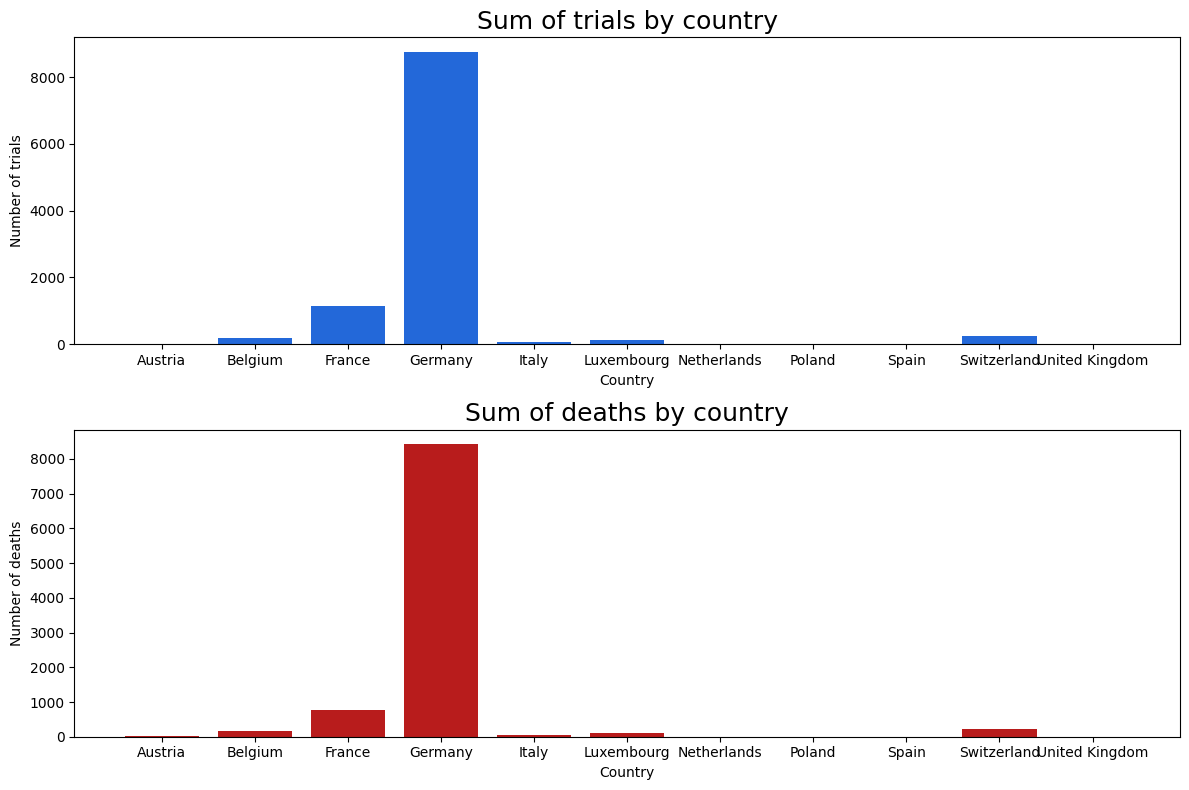

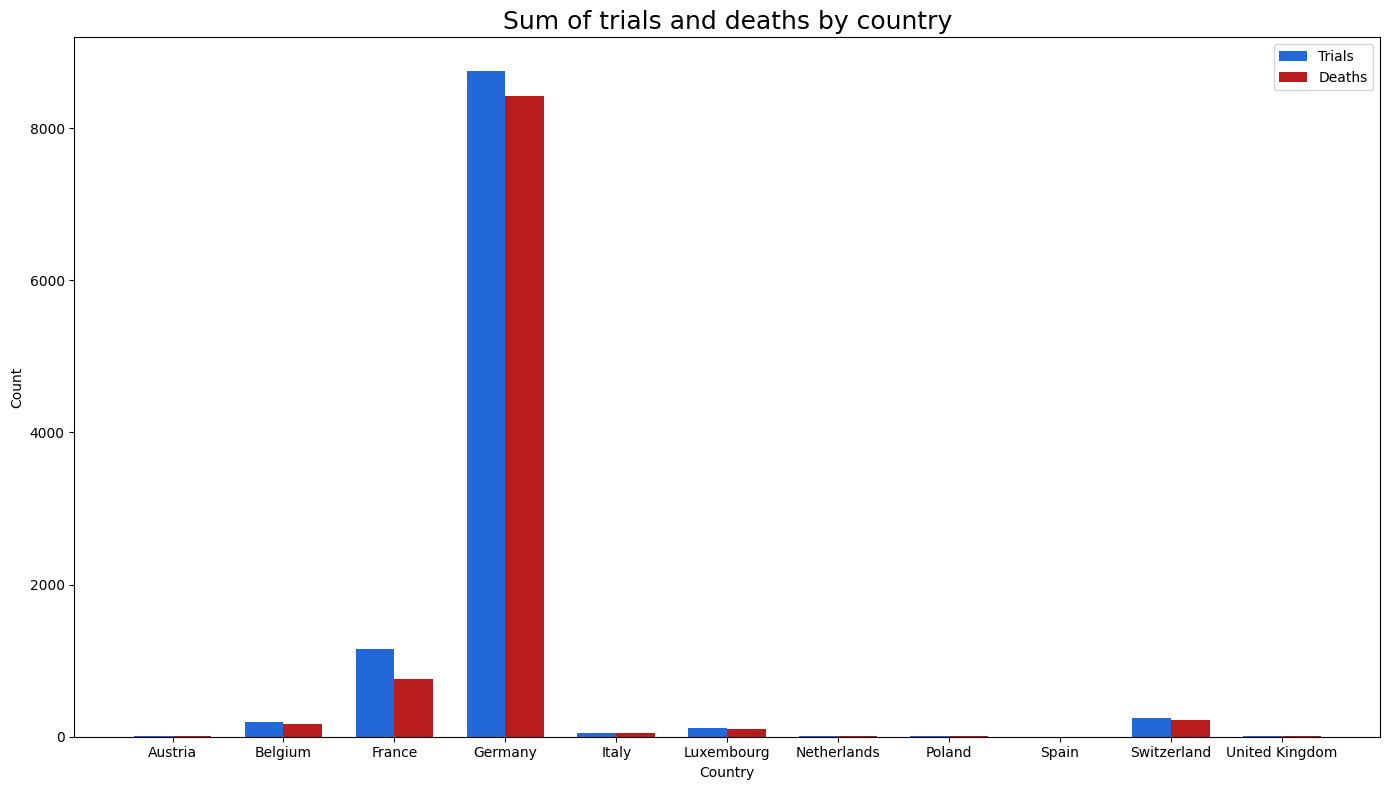

In [202]:
# Sum of trials by country, Sum of deaths by country
grouped_df=df.groupby("country")["tried","deaths"].sum()
# create figure and axes
fig3, axes3 = plt.subplots(2,1,figsize = (12,8))

# plot the bar chart
axes3[0].bar(grouped_df.index, grouped_df.tried, color=('#2368d9'))
axes3[0].set_title("Sum of trials by country", fontsize=18)
axes3[0].set_xlabel("Country")
axes3[0].set_ylabel("Number of trials")

axes3[1].bar(grouped_df.index, grouped_df.deaths, color=('#b81c1c'))
axes3[1].set_title("Sum of deaths by country", fontsize=18)
axes3[1].set_xlabel("Country")
axes3[1].set_ylabel("Number of deaths")

plt.tight_layout()

#
grouped_df=df.groupby("country")["tried","deaths"].sum()

fig, ax = plt.subplots(figsize = (14,8))

# create an x coordinate for each bar
x = np.arange(len(grouped_df.index))

# width of each bar
width = 0.35

# plot the trials bar
trials_bar = ax.bar(x - width/2, grouped_df.tried, width, color='#2368d9', label='Trials')

# plot the deaths bar
deaths_bar = ax.bar(x + width/2, grouped_df.deaths, width, color='#b81c1c', label='Deaths')

# set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index)

# set the title and labels
ax.set_title("Sum of trials and deaths by country", fontsize=18)
ax.set_xlabel("Country")
ax.set_ylabel("Count")

# add the legend
ax.legend()

plt.tight_layout()

Line chart of the average trails & deaths by decades

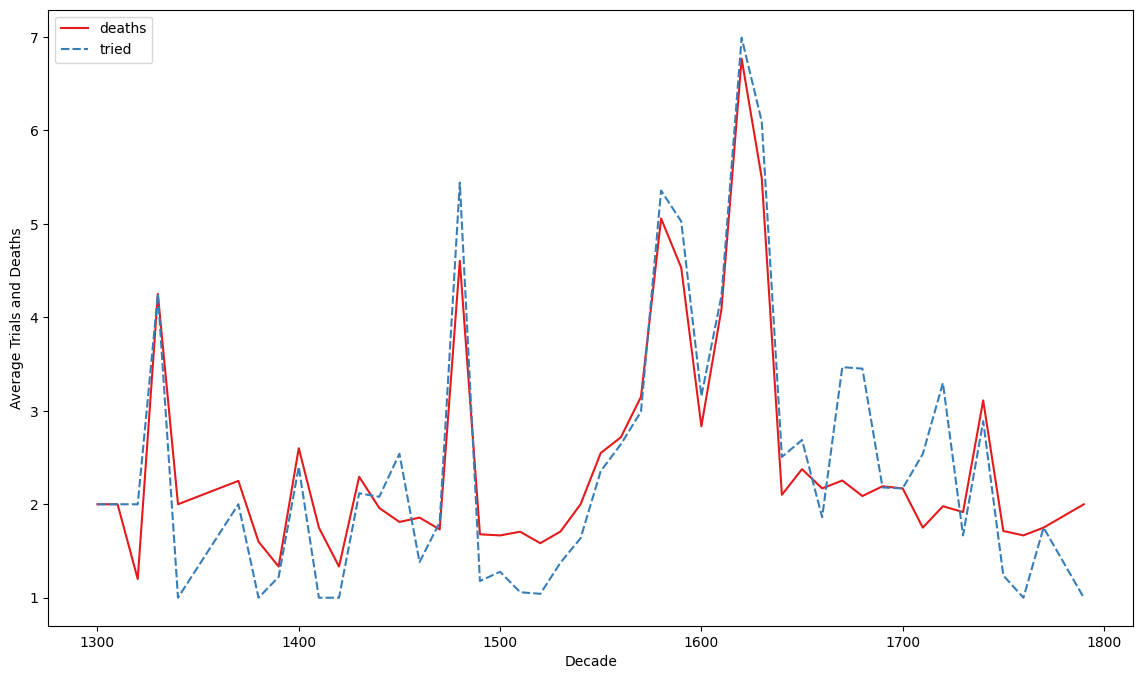

In [203]:
# trial average by decades.
average_trials_decade=df.groupby('decade').agg({'tried': 'mean'})
# deaths average by decades.
average_deaths_decade=df.groupby('decade').agg({'deaths': 'mean'})

# Concatenate the two dataframes
average_trials_deaths_decade = pd.concat([average_deaths_decade,average_trials_decade], axis=1)

# Plot the combined dataframe
sns.lineplot(data=average_trials_deaths_decade, figure=plt.figure(figsize=(14, 8)), palette = 'Set1')

plt.xlabel('Decade')
plt.ylabel('Average Trials and Deaths')
plt.legend(loc='upper left')
plt.show()

Horizontal Bar Plot of the Top 5 Region With Most Deaths

C:\Users\berka\AppData\Local\Temp\ipykernel_20140\2291388704.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



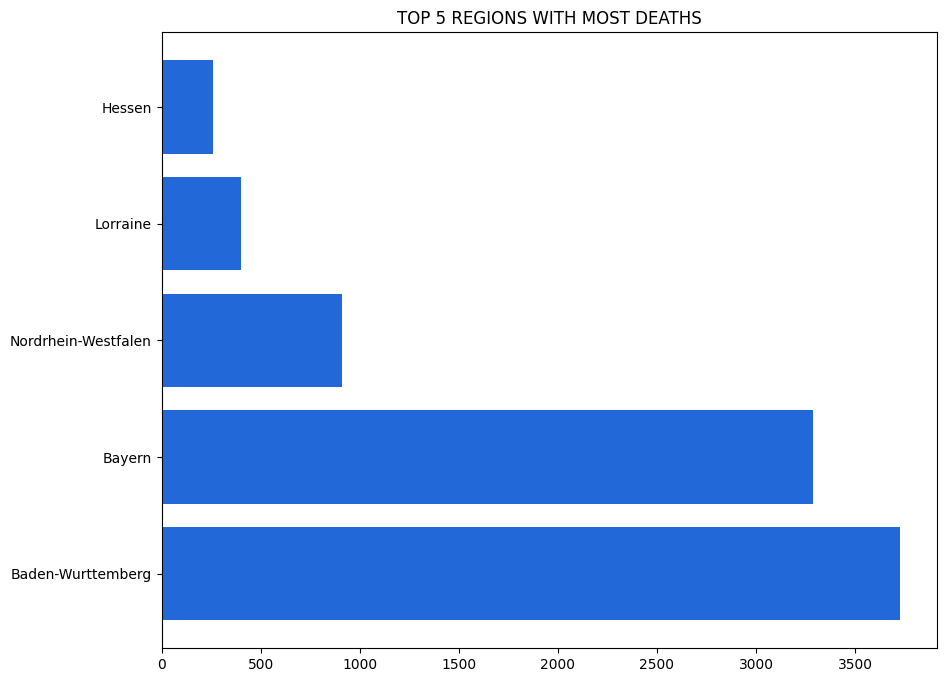

In [219]:
grouped_region = df.groupby("region").sum()
grouped_region = grouped_region["deaths"].sort_values(ascending = False).head(5)
grouped_region = pd.DataFrame(grouped_region)

grouped_region
plt.figure(figsize=(10, 8))
plt.barh(y=grouped_region.index, width=grouped_region["deaths"], color="#2368d9");
plt.title('TOP 5 REGIONS WITH MOST DEATHS');

Creating a Map for the top 5 regions with most deaths

In [205]:
import folium
import pandas as pd

# Define a dictionary of latitude and longitude for each region
region_locations = {'Bayern': [48.790769, 11.495927],
                    'Baden-Wurttemberg': [48.794649, 9.200282],
                    'Nordrhein-Westfalen': [51.465977, 7.598256],
                    'Lorraine': [48.871698, 6.275556],
                    'Hessen': [50.116667, 8.683333]}

# Create a base map centered on Germany
m = folium.Map(location=[51.163375, 10.447683], zoom_start=6)

# Create a dataframe with the region names and corresponding deaths
df6 = pd.DataFrame({'region': ['Bayern', 'Baden-Wurttemberg', 'Nordrhein-Westfalen', 'Lorraine', 'Hessen'],
                   'deaths': [5036, 4641, 926, 655, 515]})

# Loop through the dataframe and add markers for each region
for index, row in df6.iterrows():
    region = row['region']
    deaths = row['deaths']
    lat, long = region_locations[region]
    folium.Marker(location=[lat, long], popup=f"{region}: {deaths} deaths").add_to(m)

# Show the map
m